In [2]:
# unsupervised learning algorithm
# centroids: mean value of each datapoint of a given cluster.
# labels: in a given cluster, we will have so many datapoints grouped together using centroids. all those datapoints of a same cluster are labelled using labels.(say 0,1,2,etc)
# n_clusters: how many clusters when running K-Means algorithm
# elbow plot

The significance of centroids and labels is that they allow us to understand how the data is partitioned into clusters and which cluster each data point belongs to.

    Initialization: The algorithm starts by randomly initializing the centroids for each cluster.

    Assignment and Update: It then alternates between two steps:
        Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.
        Update Step: The centroids are recalculated based on the mean of the data points in each cluster.

    Convergence: The algorithm iterates through the assignment and update steps until one of the convergence criteria is met. Convergence can occur based on one of the following conditions:
        The centroids stop changing significantly between iterations. That is, the movement of centroids falls below a specified threshold.
        The maximum number of iterations is reached.

When we say "the algorithm converged," it means that the centroids have stabilized, and further iterations are unlikely to significantly change their positions. At this point, we have reached a stable clustering solution.

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['flower'] = iris.target

In [7]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [8]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
y_pred

C:\Python_Vignesh\ML_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df['cluster_labels'] = y_pred
df.head(2)

,petal length (cm),petal width (cm),cluster_labels
0,1.4,0.2,1
1,1.4,0.2,1


In [11]:
df1 = df[df.cluster_labels==0]
df2 = df[df.cluster_labels==1]
df3 = df[df.cluster_labels==2]

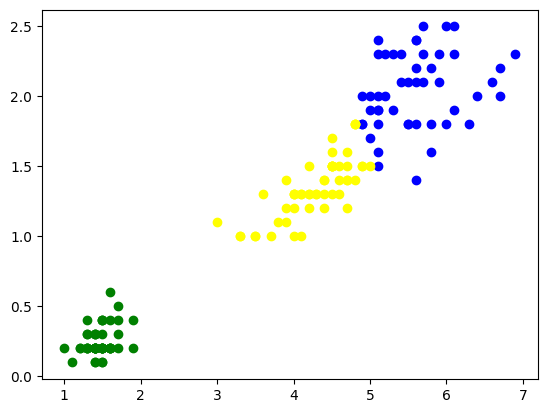

In [12]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

Elbow plot

within-cluster sum of squared distances (WCSS): it is a measure of the compactness of the clusters; it represents the sum of the squared distances between each data point and its assigned centroid within a cluster.

In [18]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df)
    wcss.append(km.inertia_)

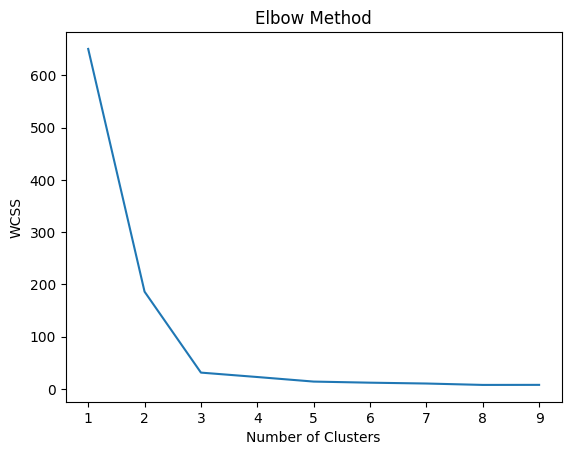

In [19]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans.inertia_ is used to calculate the within-cluster sum of squared distances (WCSS) for each value of K (number of clusters) in the K-means clustering algorithm.